In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

import pandas as pd

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import numpy as np

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics

import matplotlib.pyplot as plt
import seaborn as sns

import statistics

import joblib

# from sklearn.inspection import plot_partial_dependence

In [5]:
def setup(split):
    # setting split and path
    path = "../kitt/DATA_progress3_new/"
    train_path = "{}/{}/train/train_oversampling.csv".format(path,split)
    test_path =  "{}/test.csv".format(path)
    valid_path = "{}/{}/val/val.csv".format(path,split)

    print(train_path)
    # Load the train set
    train_data = pd.read_csv(train_path)
    print(train_data.shape)
    x_train = train_data[train_data.columns[2:]]
    print(x_train.shape)
    y_train = train_data[train_data.columns[1]]
    le = LabelEncoder()
    y_train = np.array(le.fit_transform(y_train))
    print(le.classes_)
    print(test_path)
    # Load the test set
    test_data = pd.read_csv(test_path)
    print(test_data.shape)
    x_test = test_data[test_data.columns[2:]]
    print(x_test.shape)
    y_test = test_data[test_data.columns[1]]
    le = LabelEncoder()
    y_test = np.array(le.fit_transform(y_test))
    print(le.classes_)

    print(valid_path)
    # Load the validation set
    val_data = pd.read_csv(valid_path)
    print(val_data.shape)
    x_val = val_data[val_data.columns[2:]]
    print(x_val.shape)
    y_val = val_data[val_data.columns[1]]
    le = LabelEncoder()
    y_val = np.array(le.fit_transform(y_val))
    print(le.classes_)

    # StandardScaler
    sc = StandardScaler()
    x_train = x_train.to_numpy()
    x_test = x_test.to_numpy()
    x_val = x_val.to_numpy()
    x_train = sc.fit_transform(x_train)
    x_test = sc.transform(x_test)
    x_val = sc.transform(x_val)
    
    return x_train,y_train,x_test,y_test,x_val,y_val

In [6]:
def kernal_svm_split1(split):
    # import some data to play with
    x_train,y_train,x_test,y_test,x_val,y_val = setup(split)
    X = x_train[:, [0, 6]]  # we only take the first two features. We could
                          # avoid this ugly slicing by using a two-dim dataset
    y = y_train

    h = .02  # step size in the mesh

    # we create an instance of SVM and fit out data. We do not scale our
    # data since we want to plot the support vectors
    C = 10.0  # SVM regularization parameter
    svc = svm.SVC(kernel='linear', C=C).fit(X, y)
    rbf_svc = svm.SVC(kernel='rbf', gamma=0.1, C=C).fit(X, y)
    poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X, y)
    lin_svc = svm.LinearSVC(C=C).fit(X, y)

    # create a mesh to plot in
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # title for the plots
    titles = ['SVC with linear kernel',
              'LinearSVC (linear kernel)',
              'SVC with RBF kernel',
              'SVC with polynomial (degree 3) kernel']


    for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        plt.subplot(2, 2, i + 1)
        plt.subplots_adjust(wspace=0.4, hspace=0.4)

        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

        # Plot also the training points
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
        plt.xlabel('Sepal length')
        plt.ylabel('Sepal width')
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
        plt.xticks(())
        plt.yticks(())
        plt.title(titles[i])

    plt.show()

In [7]:
def kernal_svm_split2(split):
    # import some data to play with
    x_train,y_train,x_test,y_test,x_val,y_val = setup(split)
    X = x_train[:, [0, 6]]  # we only take the first two features. We could
                          # avoid this ugly slicing by using a two-dim dataset
    y = y_train

    h = .02  # step size in the mesh

    # we create an instance of SVM and fit out data. We do not scale our
    # data since we want to plot the support vectors
    C = 100.0  # SVM regularization parameter
    svc = svm.SVC(kernel='linear', C=C).fit(X, y)
    rbf_svc = svm.SVC(kernel='rbf', gamma=0.001, C=C).fit(X, y)
    poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X, y)
    lin_svc = svm.LinearSVC(C=C).fit(X, y)

    # create a mesh to plot in
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # title for the plots
    titles = ['SVC with linear kernel',
              'LinearSVC (linear kernel)',
              'SVC with RBF kernel',
              'SVC with polynomial (degree 3) kernel']


    for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        plt.subplot(2, 2, i + 1)
        plt.subplots_adjust(wspace=0.4, hspace=0.4)

        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

        # Plot also the training points
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
        plt.xlabel('Sepal length')
        plt.ylabel('Sepal width')
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
        plt.xticks(())
        plt.yticks(())
        plt.title(titles[i])

    plt.show()

In [8]:
def kernal_svm_split3(split):
    # import some data to play with
    x_train,y_train,x_test,y_test,x_val,y_val = setup(split)
    X = x_train[:, [0, 6]]  # we only take the first two features. We could
                          # avoid this ugly slicing by using a two-dim dataset
    y = y_train

    h = .02  # step size in the mesh

    # we create an instance of SVM and fit out data. We do not scale our
    # data since we want to plot the support vectors
    C = 0.1  # SVM regularization parameter
    svc = svm.SVC(kernel='linear', C=C).fit(X, y)
    rbf_svc = svm.SVC(kernel='rbf', gamma=1, C=C).fit(X, y)
    poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X, y)
    lin_svc = svm.LinearSVC(C=C).fit(X, y)

    # create a mesh to plot in
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # title for the plots
    titles = ['SVC with linear kernel',
              'LinearSVC (linear kernel)',
              'SVC with RBF kernel',
              'SVC with polynomial (degree 3) kernel']


    for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        plt.subplot(2, 2, i + 1)
        plt.subplots_adjust(wspace=0.4, hspace=0.4)

        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

        # Plot also the training points
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
        plt.xlabel('Sepal length')
        plt.ylabel('Sepal width')
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
        plt.xticks(())
        plt.yticks(())
        plt.title(titles[i])

    plt.show()

In [9]:
def kernal_svm_split4(split):
    # import some data to play with
    x_train,y_train,x_test,y_test,x_val,y_val = setup(split)
    X = x_train[:, [0, 6]]  # we only take the first two features. We could
                          # avoid this ugly slicing by using a two-dim dataset
    y = y_train

    h = .02  # step size in the mesh

    # we create an instance of SVM and fit out data. We do not scale our
    # data since we want to plot the support vectors
    C = 100.0  # SVM regularization parameter
    svc = svm.SVC(kernel='linear', C=C).fit(X, y)
    rbf_svc = svm.SVC(kernel='rbf', gamma=0.1, C=C).fit(X, y)
    poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X, y)
    lin_svc = svm.LinearSVC(C=C).fit(X, y)

    # create a mesh to plot in
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # title for the plots
    titles = ['SVC with linear kernel',
              'LinearSVC (linear kernel)',
              'SVC with RBF kernel',
              'SVC with polynomial (degree 3) kernel']


    for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        plt.subplot(2, 2, i + 1)
        plt.subplots_adjust(wspace=0.4, hspace=0.4)

        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

        # Plot also the training points
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
        plt.xlabel('Sepal length')
        plt.ylabel('Sepal width')
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
        plt.xticks(())
        plt.yticks(())
        plt.title(titles[i])

    plt.show()

In [10]:
def kernal_svm_split5(split):
    # import some data to play with
    x_train,y_train,x_test,y_test,x_val,y_val = setup(split)
    X = x_train[:, [0, 6]]  # we only take the first two features. We could
                          # avoid this ugly slicing by using a two-dim dataset
    y = y_train

    h = .02  # step size in the mesh

    # we create an instance of SVM and fit out data. We do not scale our
    # data since we want to plot the support vectors
    C = 100.0  # SVM regularization parameter
    svc = svm.SVC(kernel='linear', C=C).fit(X, y)
    rbf_svc = svm.SVC(kernel='rbf', gamma=0.1, C=C).fit(X, y)
    poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X, y)
    lin_svc = svm.LinearSVC(C=C).fit(X, y)

    # create a mesh to plot in
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # title for the plots
    titles = ['SVC with linear kernel',
              'LinearSVC (linear kernel)',
              'SVC with RBF kernel',
              'SVC with polynomial (degree 3) kernel']


    for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        plt.subplot(2, 2, i + 1)
        plt.subplots_adjust(wspace=0.4, hspace=0.4)

        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

        # Plot also the training points
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
        plt.xlabel('Sepal length')
        plt.ylabel('Sepal width')
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
        plt.xticks(())
        plt.yticks(())
        plt.title(titles[i])

    plt.show()

# Grid

In [11]:
split_num = 5
split = "split{}".format(split_num)
x_train,y_train,x_test,y_test,x_val,y_val = setup(split)

# Define parameter grid
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
                'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                'kernel': ['linear', 'rbf', 'poly', 'sigmoid']}

# Define SGD model
model = SVC()

# Define grid search object
grid_search = GridSearchCV(model, param_grid)

# Fit grid search object to the data
grid_search.fit(x_train, y_train)

print(grid_search.best_params_)
# loss = grid_search.best_params_['loss']
# penalty = grid_search.best_params_['penalty']
# learning_rate = grid_search.best_params_['learning_rate']
# eta0 = grid_search.best_params_['eta0']
# max_iter = grid_search.best_params_['max_iter']
# alpha = grid_search.best_params_['alpha']

../kitt/DATA_progress3_new//split5/train/train_oversampling.csv
(456, 18)
(456, 16)
['B' 'M']
../kitt/DATA_progress3_new//test.csv
(114, 18)
(114, 16)
['B' 'M']
../kitt/DATA_progress3_new//split5/val/val.csv
(91, 18)
(91, 16)
['B' 'M']
{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}


In [12]:
# {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
# {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
# {'C': 0.1, 'gamma': 1, 'kernel': 'linear'}
# {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
# {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}

In [22]:
# kernal_svm_split1("split1")

../kitt/DATA_progress3_new//split2/train/train_oversampling.csv
(456, 18)
(456, 16)
['B' 'M']
../kitt/DATA_progress3_new//test.csv
(114, 18)
(114, 16)
['B' 'M']
../kitt/DATA_progress3_new//split2/val/val.csv
(91, 18)
(91, 16)
['B' 'M']


C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


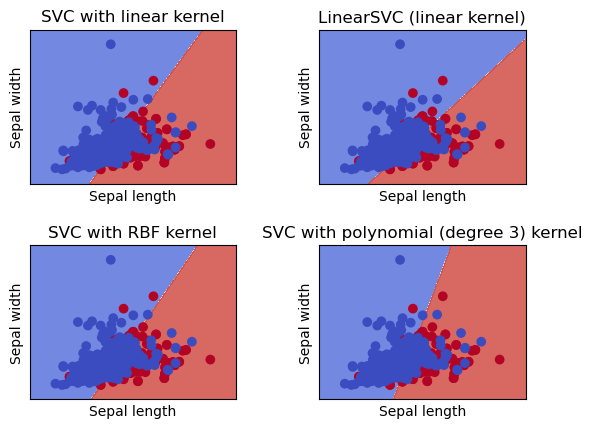

In [14]:
kernal_svm_split2("split2")

In [21]:
# kernal_svm_split3("split3")

In [19]:
# kernal_svm_split4("split4")

In [20]:
# kernal_svm_split5("split5")